In [32]:
import xarray as xr
import xmitgcm
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from xgcm import Grid

In [33]:
SOUTHLAT = -50.
WESTLON = 0.0
LENLAT = 20.0
LENLON = 22.0

n = 4
NIGLOBAL = 22 * n
NJGLOBAL = 20 * n

In [34]:
xq = np.linspace(WESTLON, WESTLON+LENLON, NIGLOBAL+1)
yq = np.linspace(SOUTHLAT, SOUTHLAT+LENLAT, NJGLOBAL+1)

xh = 0.5*(xq[0:-1] + xq[1:])
yh = 0.5*(yq[0:-1] + yq[1:])

depths_i = xr.DataArray(np.linspace(0,3000,31),dims='zi')
depths_l = xr.DataArray(0.5*(np.linspace(0,3000,31)[0:-1] + np.linspace(0,3000,31)[1:]), dims='zl')

In [35]:
damp1D = np.zeros(NJGLOBAL)

y_sel = yh[yh > (SOUTHLAT + LENLAT)-2]
len_damp = len(y_sel)


damp1D[(NJGLOBAL - len_damp):]=np.linspace(0,1,len_damp)

damp1D = xr.DataArray(damp1D, coords={'yh':yh})
Temp1d = xr.DataArray(np.array([7.22342426, 6.51847912, 5.87855744, 5.29766153, 4.77034689,
       4.29167125, 3.85714819, 3.46270512, 3.1046451 , 2.77961219,
       2.48456   , 2.21672315, 1.97359131, 1.75288571, 1.55253779,
       1.37066977, 1.20557708, 1.05571238, 0.91967105, 0.79617805,
       0.68407592, 0.58231399, 0.48993847, 0.40608359, 0.3299634 ,
       0.26086447, 0.19813915, 0.14119955, 0.08951201, 0.04259208]), dims=['zl'])

In [36]:
ds = xr.Dataset()

tau = 1.2*10**-6

ds['Idamp'] = xr.DataArray(np.ones( (1, NJGLOBAL, NIGLOBAL), ), dims=['z1','yh','xh'], coords={'yh':yh, 'xh':xh}) * damp1D * tau

ds['ETA'] = xr.DataArray(np.ones( (len(depths_i), NJGLOBAL, NIGLOBAL), ), dims=['zi','yh','xh'], coords={'yh':yh, 'xh':xh, 'zi':depths_i}) * (-depths_i)
ds['Temp'] = xr.DataArray(np.ones( (len(depths_l), NJGLOBAL, NIGLOBAL), ), dims=['zl','yh','xh'], coords={'yh':yh, 'xh':xh, 'zl':depths_l}) * Temp1d
ds['SALT'] = ds.Temp*0.0 + 35

In [37]:
ds.to_netcdf("sponge_damping_p25.nc")

In [28]:
# run a few timesteps at the new resolution without a sponge
dir = '/scratch/db194/mom6/apr2025/MOM6_channel/'
prog = xr.open_dataset(dir+'prog.nc',decode_times=False)
prog_z = xr.open_dataset(dir+'prog_z.nc',decode_times=False)

In [29]:
prog_z

<xarray.Dataset>
Dimensions:  (xh: 22, yh: 20, z_l: 30, z_i: 31, Time: 200, xq: 23, yq: 21)
Coordinates:
  * xh       (xh) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 17.5 18.5 19.5 20.5 21.5
  * yh       (yh) float64 -49.5 -48.5 -47.5 -46.5 ... -33.5 -32.5 -31.5 -30.5
  * z_l      (z_l) float64 50.0 150.0 250.0 350.0 ... 2.75e+03 2.85e+03 2.95e+03
  * z_i      (z_i) float64 0.0 100.0 200.0 300.0 ... 2.8e+03 2.9e+03 3e+03
  * Time     (Time) float64 1.0 2.0 3.0 4.0 5.0 ... 197.0 198.0 199.0 200.0
  * xq       (xq) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 18.0 19.0 20.0 21.0 22.0
  * yq       (yq) float64 -50.0 -49.0 -48.0 -47.0 ... -33.0 -32.0 -31.0 -30.0
Data variables:
    temp     (Time, z_l, yh, xh) float32 ...
    umo      (Time, z_l, yh, xq) float32 ...
    vmo      (Time, z_l, yq, xh) float32 ...
    u        (Time, z_l, yh, xq) float32 ...
    v        (Time, z_l, yq, xh) float32 ...
    h        (Time, z_l, yh, xh) float64 ...
Attributes:
    filename:   prog_z.nc
    title:      MOM Experiment
    grid_type:  regular
    grid_tile:  N/A

In [30]:
prog_z

<xarray.Dataset>
Dimensions:  (xh: 22, yh: 20, z_l: 30, z_i: 31, Time: 200, xq: 23, yq: 21)
Coordinates:
  * xh       (xh) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 17.5 18.5 19.5 20.5 21.5
  * yh       (yh) float64 -49.5 -48.5 -47.5 -46.5 ... -33.5 -32.5 -31.5 -30.5
  * z_l      (z_l) float64 50.0 150.0 250.0 350.0 ... 2.75e+03 2.85e+03 2.95e+03
  * z_i      (z_i) float64 0.0 100.0 200.0 300.0 ... 2.8e+03 2.9e+03 3e+03
  * Time     (Time) float64 1.0 2.0 3.0 4.0 5.0 ... 197.0 198.0 199.0 200.0
  * xq       (xq) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 18.0 19.0 20.0 21.0 22.0
  * yq       (yq) float64 -50.0 -49.0 -48.0 -47.0 ... -33.0 -32.0 -31.0 -30.0
Data variables:
    temp     (Time, z_l, yh, xh) float32 ...
    umo      (Time, z_l, yh, xq) float32 ...
    vmo      (Time, z_l, yq, xh) float32 ...
    u        (Time, z_l, yh, xq) float32 ...
    v        (Time, z_l, yq, xh) float32 ...
    h        (Time, z_l, yh, xh) float64 ...
Attributes:
    filename:   prog_z.nc
    title:      MOM Experiment
    grid_type:  regular
    grid_tile:  N/A

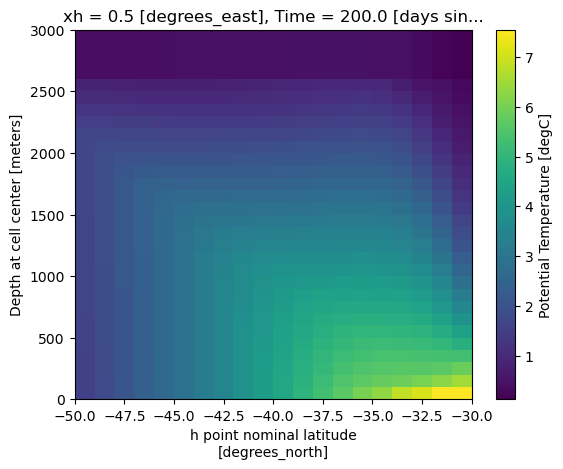

In [31]:
prog_z.temp.isel(Time=-1, xh=0).plot()

In [15]:
sponge_data = xr.open_dataset(dir+'INPUT/sponge_damping.nc', decode_times=False)

In [16]:
sponge_data

<xarray.Dataset>
Dimensions:  (z1: 1, ny: 20, nx: 22, z: 31, zl: 30)
Coordinates:
    XC       (ny, nx) float64 ...
    YC       (ny, nx) float64 ...
Dimensions without coordinates: z1, ny, nx, z, zl
Data variables:
    Idamp    (z1, ny, nx) float64 ...
    ETA      (z, ny, nx) float64 ...
    Temp     (zl, ny, nx) float64 ...
    SALT     (zl, ny, nx) float64 ...

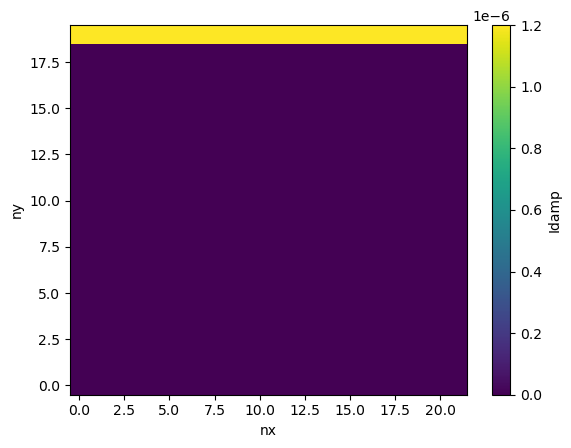

In [17]:
sponge_data.Idamp.isel(z1=0).plot()

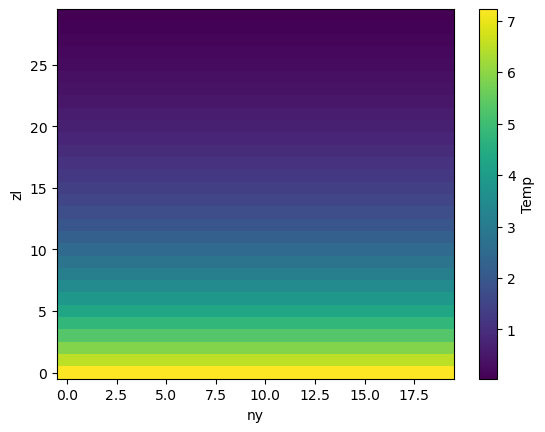

In [18]:
sponge_data.Temp.isel(nx=0).plot()

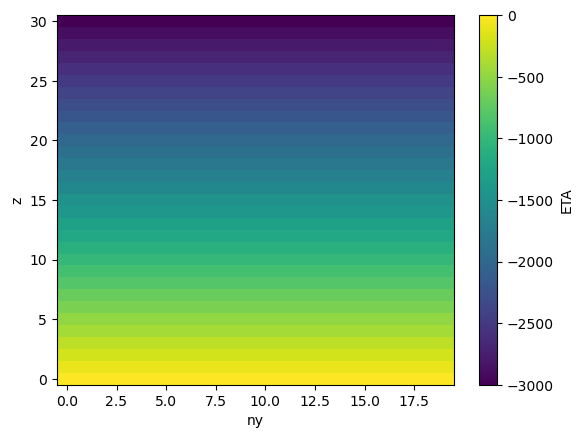

In [19]:
sponge_data.ETA.isel(nx=0).plot()

# Sponge damping

In [3]:
XC = xr.ones_like(prog.ssh.isel(Time=0))*prog.xh
YC = xr.ones_like(prog.ssh.isel(Time=0))*prog.yh

In [4]:
damp1D = np.zeros(20)
damp1D[18:]=np.linspace(0,1,2)

In [5]:
depths = xr.DataArray(np.linspace(0,3000,31),dims='zi')
depths2 = xr.DataArray(np.linspace(0,3000,32)[1:-1],dims='zl')

damping = np.expand_dims((xr.ones_like(prog.ssh.isel(Time=0))).values*np.repeat(np.expand_dims(damp1D,1),22,axis=1)*1.2*10**-6,0)

increase_depth = (xr.ones_like(prog.ssh.isel(Time=0))*-depths).transpose('zi','yh','xh').values
zero_dummy2 = xr.ones_like((prog.ssh.isel(Time=0)*depths2).transpose('zl','yh','xh')).values*35
temp = (xr.ones_like(prog.ssh.isel(Time=0))*
#<I suggest loading the old sponge data and using it here so you're sure you're using the same profile>
       ).transpose('zl','yh','xh').values
temp[-1,:,:]= temp[-2,:,:]

SyntaxError: invalid syntax (3942461605.py, line 9)

In [13]:
ds = xr.Dataset(
    data_vars=dict(
        Idamp=(["z1","ny", "nx"], damping),
        ETA=(["z","ny", "nx"], increase_depth),
        Temp=(["zl","ny", "nx"], temp),
        SALT=(["zl","ny", "nx"], zero_dummy2)
    ),
    coords=dict(
        XC=(["ny", "nx"], XC.values),
        YC=(["ny", "nx"], YC.values))
)

In [14]:
ds.to_netcdf("sponge_damping.nc")